In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_excel("./Airbnb_V1_clean.xlsx")

Summary statistics of dataset:

In [3]:
# Dataset description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45756.0,2.309535e+07,1.382572e+07,2595.00000,1.061546e+07,2.224709e+07,3.593987e+07,4.533040e+07
host_id,45756.0,8.437272e+07,9.920451e+07,2438.00000,9.250917e+06,3.726838e+07,1.359344e+08,3.665571e+08
host_response_rate,21908.0,8.729870e-01,2.599574e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,29228.0,8.048460e-01,2.771249e-01,0.00000,7.200000e-01,9.400000e-01,1.000000e+00,1.000000e+00
latitude,45756.0,4.072963e+01,5.502481e-02,40.50868,4.069003e+01,4.072455e+01,4.076316e+01,4.091214e+01
longitude,45756.0,-7.395075e+01,4.777557e-02,-74.23986,-7.398315e+01,-7.395539e+01,-7.393399e+01,-7.371299e+01
accommodates,45756.0,2.773429e+00,1.818494e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,41349.0,1.292945e+00,6.837461e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01
beds,45251.0,1.511083e+00,1.100529e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01
price,45756.0,1.495575e+02,3.153679e+02,0.00000,6.500000e+01,1.000000e+02,1.600000e+02,1.000000e+04


Count of listings in different neighborhoods

In [4]:
data.neighbourhood_group_cleansed.value_counts()

Manhattan        20236
Brooklyn         18263
Queens            5746
Bronx             1185
Staten Island      326
Name: neighbourhood_group_cleansed, dtype: int64

In [5]:
t_amenities = []
for amenities in data.amenities:
    t_amenities.append(amenities)
    
def amenities_split(amenities):
    split_n = str(amenities).split(',')
    return split_n

t_amenities_count = []
for i in t_amenities:
    for word in amenities_split(i):
        word = word.lower()
        t_amenities_count.append(word)

In [6]:
from collections import Counter
#top 25 used words by amenities to name their listing
Top_25_words=Counter(t_amenities_count).most_common()
Top_25_words=Top_25_words[0:25]

Count of occurence of each amenity in the dataset:

In [7]:
Top_25_words

[(' "wifi"', 44224),
 (' "heating"', 40704),
 (' "kitchen"', 39944),
 (' "air conditioning"', 38752),
 (' "smoke alarm"', 38529),
 (' "essentials"]', 34768),
 (' "hangers"', 33751),
 (' "tv"', 31378),
 (' "shampoo"', 29799),
 (' "hair dryer"', 29199),
 (' "carbon monoxide alarm"', 28371),
 (' "hot water"', 25225),
 ('["iron"', 19444),
 (' "dishes and silverware"', 19281),
 (' "refrigerator"', 18272),
 (' "washer"', 17986),
 (' "dryer"', 17295),
 (' "fire extinguisher"', 17189),
 (' "microwave"', 16780),
 (' "cooking basics"', 16686),
 (' "stove"', 16575),
 (' "free street parking"', 15955),
 (' "first aid kit"', 15332),
 (' "coffee maker"', 15310),
 (' "laptop-friendly workspace"', 14922)]

In [8]:
#putting the findings in dataframe for further visualizations
sub_words = pd.DataFrame(Top_25_words)
sub_words.rename(columns = {0:'Amenities',1:'Count'}, inplace=True)

Plot representing the top 25 most common amenity:

[Text(0, 0, ' "wifi"'),
 Text(0, 0, ' "heating"'),
 Text(0, 0, ' "kitchen"'),
 Text(0, 0, ' "air conditioning"'),
 Text(0, 0, ' "smoke alarm"'),
 Text(0, 0, ' "essentials"]'),
 Text(0, 0, ' "hangers"'),
 Text(0, 0, ' "tv"'),
 Text(0, 0, ' "shampoo"'),
 Text(0, 0, ' "hair dryer"'),
 Text(0, 0, ' "carbon monoxide alarm"'),
 Text(0, 0, ' "hot water"'),
 Text(0, 0, '["iron"'),
 Text(0, 0, ' "dishes and silverware"'),
 Text(0, 0, ' "refrigerator"'),
 Text(0, 0, ' "washer"'),
 Text(0, 0, ' "dryer"'),
 Text(0, 0, ' "fire extinguisher"'),
 Text(0, 0, ' "microwave"'),
 Text(0, 0, ' "cooking basics"'),
 Text(0, 0, ' "stove"'),
 Text(0, 0, ' "free street parking"'),
 Text(0, 0, ' "first aid kit"'),
 Text(0, 0, ' "coffee maker"'),
 Text(0, 0, ' "laptop-friendly workspace"')]

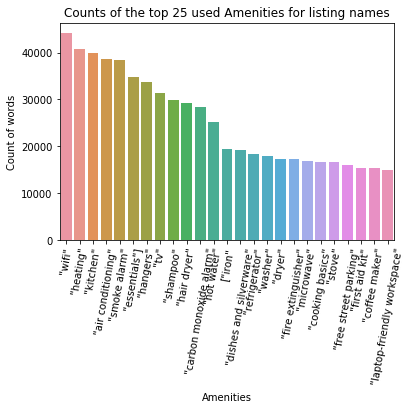

In [9]:
viz_1=sns.barplot(x='Amenities', y='Count', data=sub_words)
viz_1.set_title('Counts of the top 25 used Amenities for listing names')
viz_1.set_ylabel('Count of words')
viz_1.set_xlabel('Amenities')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

Word Cloud representing the frequency of each amenity:

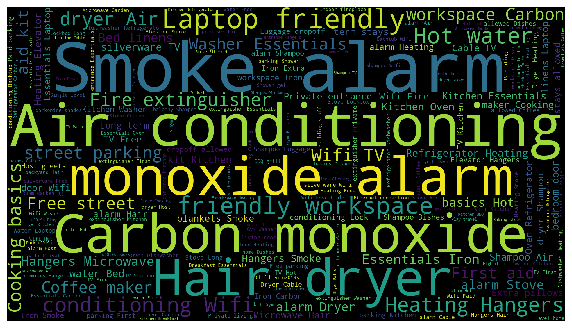

In [10]:
plt.subplots(figsize=(10,6))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.amenities))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('amenities.png')
plt.show()

Airbnb room type vs price of any listing

Text(0.5, 1.0, 'Room Type vs Price')

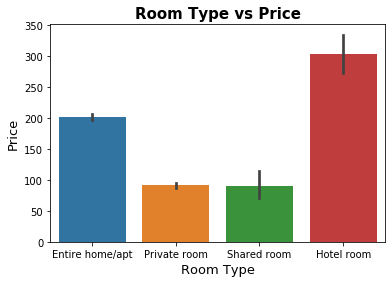

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x='room_type', y='price', data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Count of room_type available in neighborhood locations. 

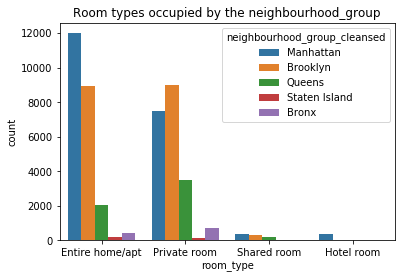

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'room_type',hue = "neighbourhood_group_cleansed",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

Representation of available Airbnb listings in different neighbourhood_group 

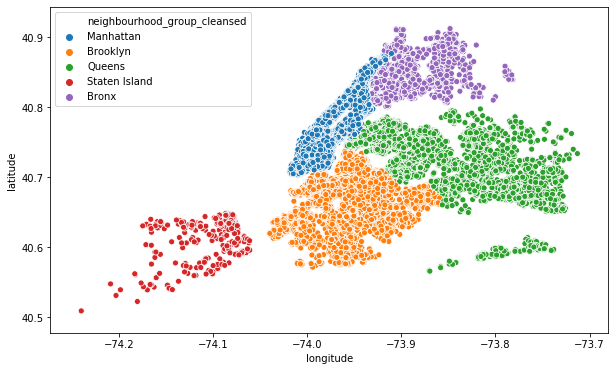

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group_cleansed)
plt.ioff()

It can be observed that low cost rooms or rooms in range 0-50 $ have more reviews.

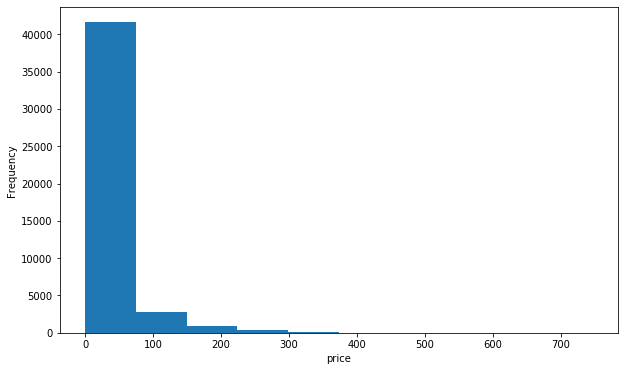

In [15]:
plt.figure(figsize=(10,6))
data['number_of_reviews'].plot(kind='hist')
plt.xlabel("price")
plt.ioff()
plt.show()

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

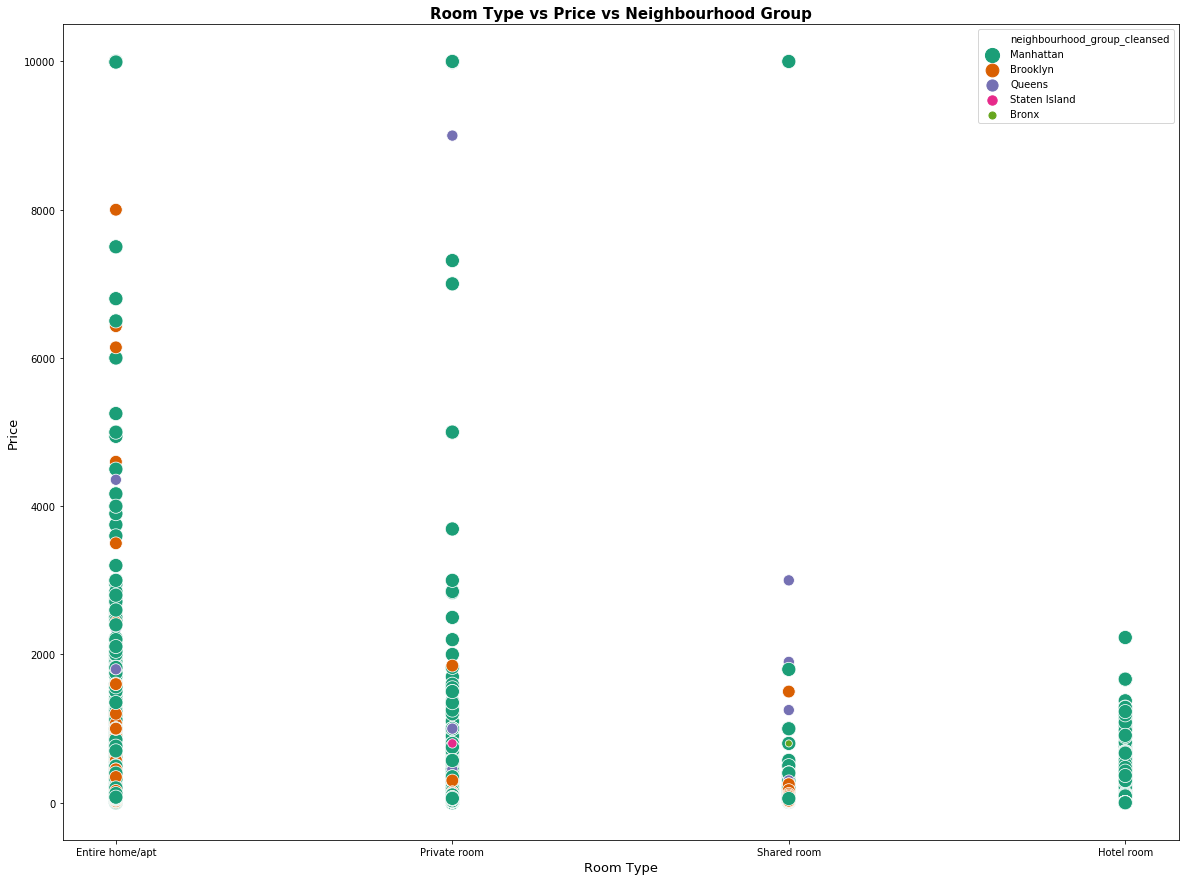

In [16]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group_cleansed", size="neighbourhood_group_cleansed",
            sizes=(50, 200), palette="Dark2", data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Area wise distribution of price shows that Manhattan has expensive and Staten Island has low priced rooms

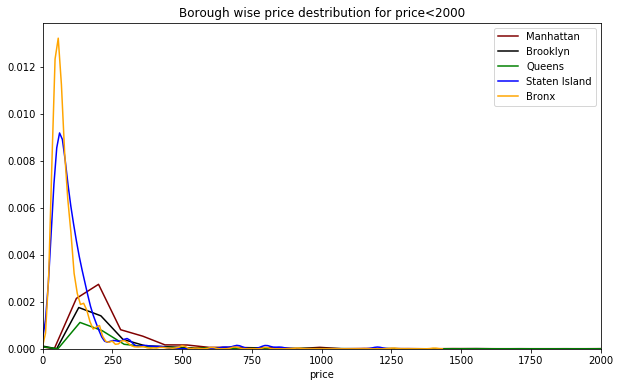

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group_cleansed=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group_cleansed=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group_cleansed=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group_cleansed=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(data[data.neighbourhood_group_cleansed=='Bronx'].price,color='orange',hist=False,label='Bronx')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

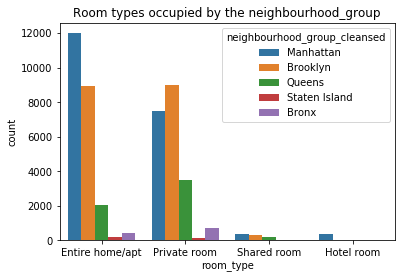

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x = 'room_type',hue = "neighbourhood_group_cleansed",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()